## Exploratory Data Analysis: Kaggle 2018 DS and ML survey
## Getting a data science job in Portugal
In this analysis the question I will try to answer is, how would somebody with my background do in the Portuguese "Data Science" Market? The way I will answer this question is to find out how similar my background is to the employed data scientists who responded to the kaggle DS 2018 survey. This is a very specific question to answer, and much like in the real world, the data here is not perfectly shaped to answer the question we are asking. So, first we are going to 'clean' the data a bit, then we will explore the data, and finally, we will try and get a feel for how reliable our sample size is using data visualization.


## Import the data
Here we import the csv using the pandas python library, converting the csv to a datatype specific to pandas, a dataframe. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('multipleChoiceResponses.csv', low_memory=False)
df.head(3)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


## Clean the data
Right now our dataframe is huge. Let's filter the dataframe to only show the columns we are interested in, as well as rename the columns and drop row 0 (which is just a list of the original columns names)

In [2]:
cols_we_want = ['Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q9','Q11_Part_1','Q11_Part_3','Q11_Part_6']
new_col_names = ['gender','age_group','country','highest_education','major','job','experience','yearly_compensation','does_analysis','does_data_eng','does_neither']
port_df = df[cols_we_want]
port_df = port_df.drop(0)
print('Original column names\n')
port_df.columns = new_col_names
print(df[cols_we_want].columns)
print('\nNew dataframe with new column names')
port_df.head(3)

Original column names

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q9', 'Q11_Part_1',
       'Q11_Part_3', 'Q11_Part_6'],
      dtype='object')

New dataframe with new column names


,gender,age_group,country,highest_education,major,job,experience,yearly_compensation,does_analysis,does_data_eng,does_neither
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,NaN,NaN,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,NaN
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,5-10,"10-20,000",NaN,NaN,None of these activities are an important part...
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,"0-10,000",Analyze and understand data to influence produ...,NaN,NaN


Most of the column names are self-explanatory, but the last three are not so I will explain them here.

In [3]:
print('column:\t does_analysis\t respondent does data analysis in their daily work')
print('column:\t does_data_eng\t respondent does data engineering in their daily work')
print('column:\t does_neither\t respondent does not work with data in their daily work')

column:	 does_analysis	 respondent does data analysis in their daily work
column:	 does_data_eng	 respondent does data engineering in their daily work
column:	 does_neither	 respondent does not work with data in their daily work


## Okay, now let's filter out some rows
Since our target population is "data scientists working in Portugal" we need to filter our dataframe to include only rows that fit that description. Right now, we are looking at all the survey respondents, which includes some groups that we don't want, like students, unemployed, people who are not working in Data Science, and of course, people not living in Portugal!

In [4]:
print('Total number of survey respondents\t '+ str(len(port_df)))
port_df = port_df[port_df.country == 'Portugal']
print('Respondents from Portugal:\t ' + str(len(port_df)))

Total number of survey respondents	 23859
Respondents from Portugal:	 155


Now lets remove students, unemployed, and anyone not doing data science tasks at work

In [5]:
port_df = port_df[
    (port_df.job != 'Student') &
    (port_df.job != 'Not employed') &
    (port_df.does_neither.isna())
]
print('Sample size:', len(port_df))
port_df.head(3)

Sample size: 99


,gender,age_group,country,highest_education,major,job,experience,yearly_compensation,does_analysis,does_data_eng,does_neither
768,Male,30-34,Portugal,Bachelor’s degree,"A business discipline (accounting, economics, ...",Data Analyst,2-3,"30-40,000",Analyze and understand data to influence produ...,NaN,NaN
1060,Male,45-49,Portugal,Master’s degree,"Computer science (software engineering, etc.)",Research Scientist,5-10,"0-10,000",NaN,NaN,NaN
1218,Male,40-44,Portugal,Doctoral degree,"Computer science (software engineering, etc.)",Data Scientist,1-2,"20-30,000",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,NaN


## Final sample size: 99 , Yikes!
As you can see, our sample size shrunk considerably from 28,000 to 99. Unfortunately, 99 respondents may not be enough people from our target population to draw conclusions about the whole population (all data scientists working in Portugal). The ideal dataset would be the the CV of every data scientist in Portugal but it might take a while for me to ask them all, so for now we will explore our tiny sample ;)



## Distrubution plots
Distribution plots help us get a feel for how the variables in our dataset are distributed. They give us a better understanding than we can get from just reading through the columns and rows in our dataframe. After all, the goal of the data analyst is to take (messy) data and create digestible information.

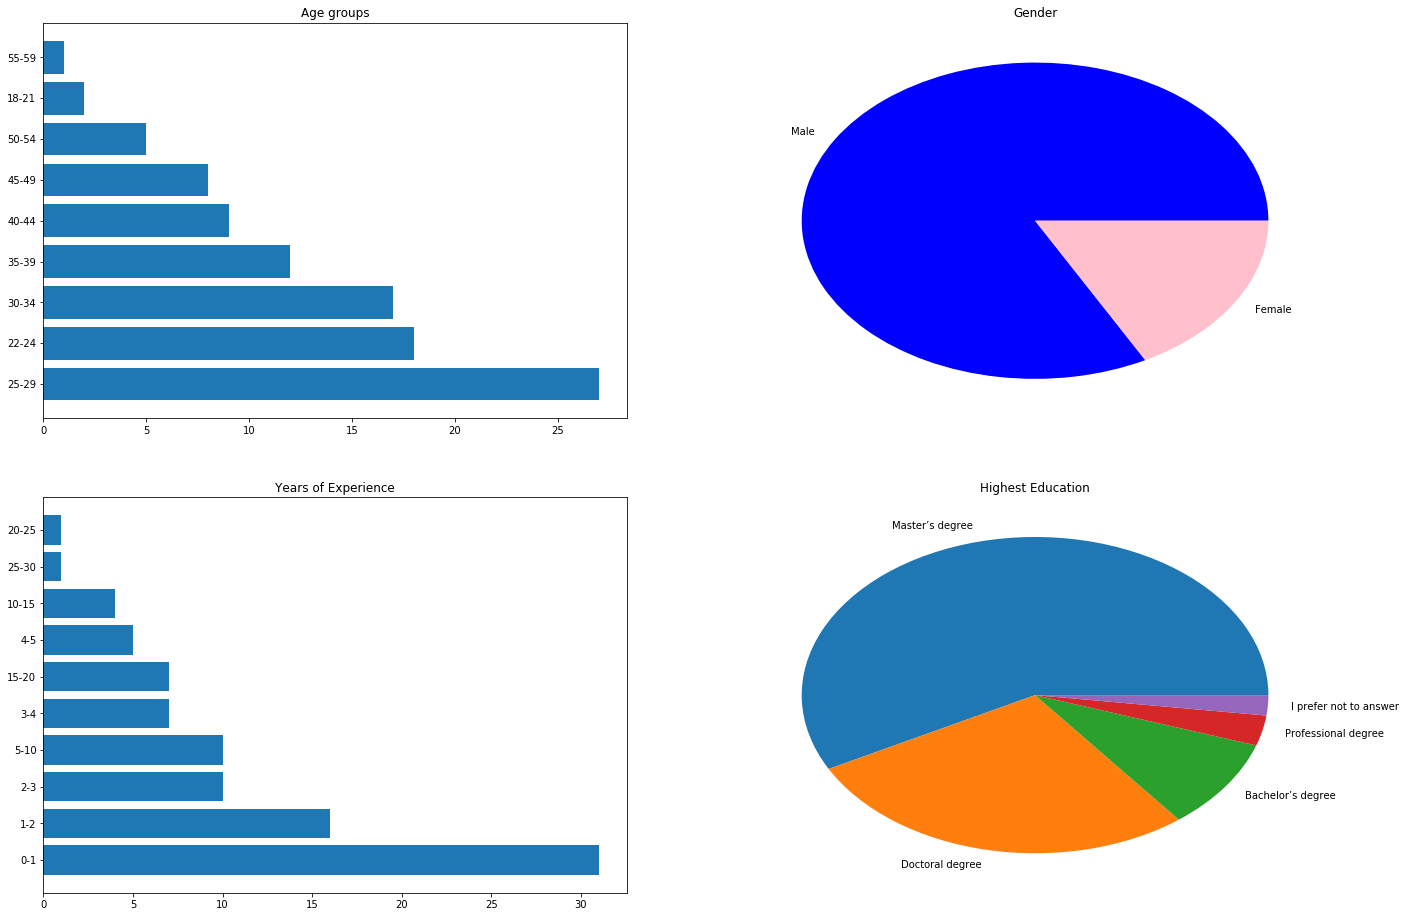

In [6]:
%matplotlib inline

fig = plt.figure(figsize=(23,16))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

gender = port_df.gender.value_counts()
age = port_df.age_group.value_counts()
experience = port_df.experience.value_counts() 
education = port_df.highest_education.value_counts()

ax1.barh(age.index,age.values)
ax1.set_title('Age groups')
ax2.pie(gender.values, labels=gender.index, colors=['blue','pink'])
ax2.set_title('Gender')
ax3.barh(experience.index,experience.values)
ax3.set_title('Years of Experience')
ax4.pie(education.values,labels=education.index)
ax4.set_title('Highest Education')
#plt.legend(loc="upper left")
plt.show()


Note: 45 peeps in our target population have been hired in the last 2 years. This may indicate a DS boom, or kaggle is just really popular among DS newcomers

Of the people hired in the last ONE year, what is the education breakdown

In [7]:
one_year = port_df[port_df.experience == '0-1']  
print(one_year.highest_education.value_counts(),'\n\n')
print(one_year.major.value_counts(),'\n\n')

print('According to the data, the vast majority of graduates hired in the last year:\n')
print('Had a masters degree and their area of study was computer science or math/statistics')

Master’s degree        27
Doctoral degree         2
Professional degree     1
Bachelor’s degree       1
Name: highest_education, dtype: int64 


Computer science (software engineering, etc.)                   16
Mathematics or statistics                                        7
Engineering (non-computer focused)                               4
Physics or astronomy                                             3
A business discipline (accounting, economics, finance, etc.)     1
Name: major, dtype: int64 


According to the data, the vast majority of graduates hired in the last year:

Had a masters degree and their area of study was computer science or math/statistics


Since there is no official statistic for "how large is the data scientist population in Portugal" I will have to get creative to try and understand if this is a statistically significant sample or not.
NOTE: the following is more of a thought exerecise than an actual, reliable data analysis. Now, let's continue.

https://www.datascienceportugal.com/  "Data Science Portugal is an informal community of data science enthusiasts, created with the purpose of sharing knowledge and experience in the fields of Data Science, Machine Learning and Artificial Intelligence."... They claim to have had 1.6k attendees at there last event. Becuase this was the first event of it's kind in Portugal, and it was aimed specifically at data scientists, let's assume for the sake of this analysis that it brought out 10% of Portugal's total data science community. that would mean the population of Portugal's data science community is 16000 people. Of that community, let assume half are students and half are employees. http://www.portugalin.gov.pt/innovation/ tells us that Portugal's Tech sector has about 98k employees, and we are assuming 8k of them program using data in some way. 

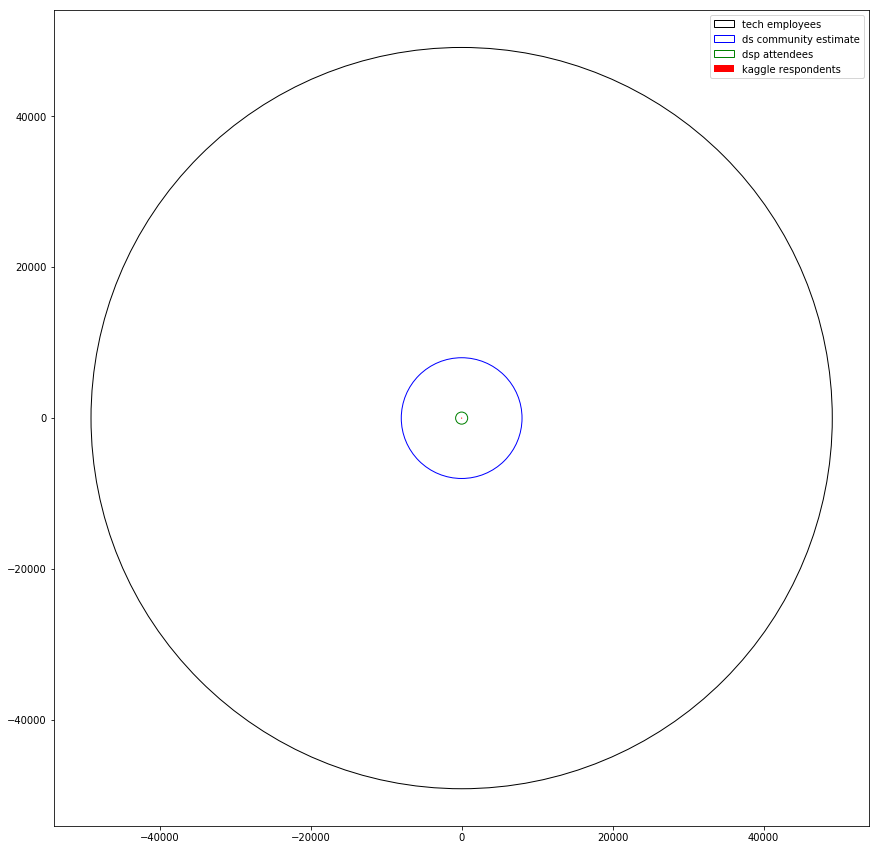

In [8]:
%matplotlib inline
populations = {'tech_employees':98221, 'ds_community':16000,'ds_students':8000, 'ds_employees':8000,'dsp_attendees':1600, 'kaggle_respondents':155}
fig = plt.figure(figsize=(15,15))
plt.axes()

tech = plt.Circle((0, 0), radius=populations.get('tech_employees')/2, ec='black',label='tech employees',fill=False)
ds_community = plt.Circle((0,-.4), radius=populations.get('ds_community')/2, ec='blue',label='ds community estimate',fill=False)
dsp_attendees = plt.Circle((0,-.4), radius=populations.get('dsp_attendees')/2, ec='green',label='dsp attendees',fill=False)
kaggle_respondents = plt.Circle((0,-.4), radius=populations.get('kaggle_respondents')/2, fc='red',label='kaggle respondents',fill=True)

 


plt.gca().add_patch(tech)
plt.gca().add_patch(ds_community)
plt.gca().add_patch(dsp_attendees)
plt.gca().add_patch(kaggle_respondents)
plt.legend()
plt.axis('scaled')
plt.show()

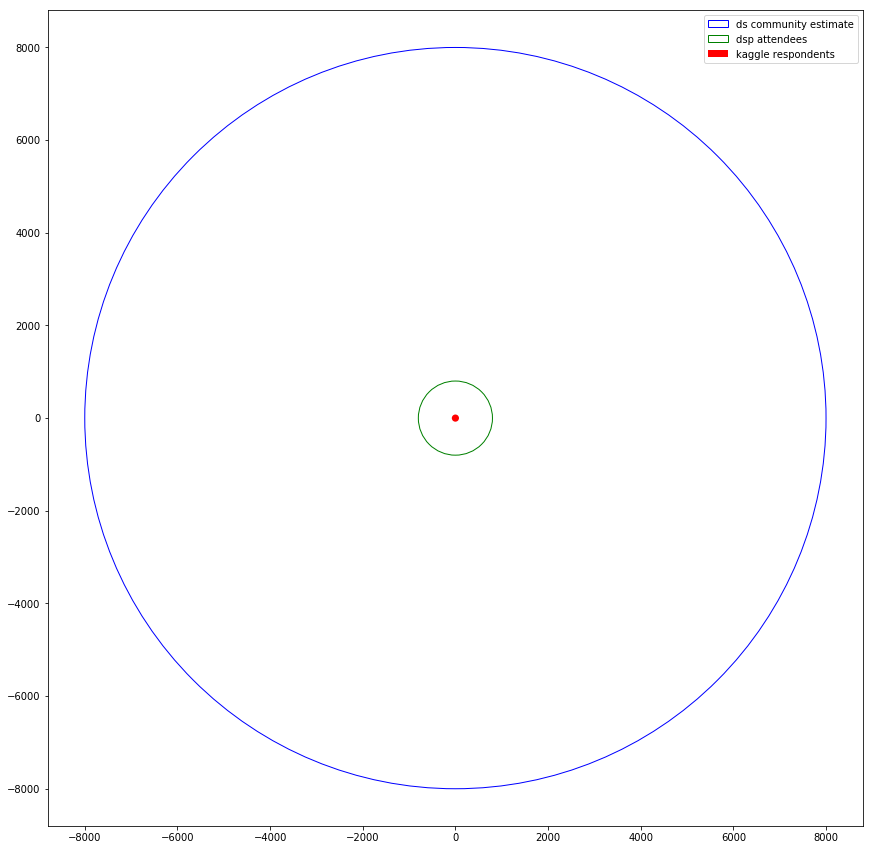

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(15,15))
plt.axes()

ds_community = plt.Circle((0,-.4), radius=populations.get('ds_community')/2, ec='blue',label='ds community estimate',fill=False)
dsp_attendees = plt.Circle((0,-.4), radius=populations.get('dsp_attendees')/2, ec='green',label='dsp attendees',fill=False)
kaggle_respondents = plt.Circle((0,-.4), radius=populations.get('kaggle_respondents')/2, fc='red',label='kaggle respondents',fill=True)

 

plt.gca().add_patch(ds_community)
plt.gca().add_patch(dsp_attendees)
plt.gca().add_patch(kaggle_respondents)
plt.legend()
plt.axis('scaled')
plt.show()

 ## So... is 155 respondents a proper sample size?
Probably not. I would say there is a high probability of sampling error.